# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Mahathir
- **Email:** mhmmdmhthr@gmail.com
- **ID Dicoding:** MC322D5Y1764

## Menentukan Pertanyaan Bisnis

Dalam proyek ini, kita akan fokus pada dua pertanyaan bisnis utama:

1. Bagaimana pola penggunaan sepeda berdasarkan waktu (musim, bulan, hari, jam) dan faktor cuaca?
2. Bagaimana perbandingan antara pengguna casual dan registered dalam sistem bike sharing?

## Import Semua Packages/Library yang Digunakan

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style for visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Data Wrangling

### Gathering Data

Pada tahap ini, kita akan membaca dataset dari file CSV yang tersedia.

In [21]:
# Read the datasets
hour_df = pd.read_csv('data/hour.csv')
day_df = pd.read_csv('data/day.csv')

# Display basic information about the datasets
print("Hourly Dataset Info:")
hour_df.info()
print("\nDaily Dataset Info:")
day_df.info()

Hourly Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB

Daily Dataset Info:
<class 

**Insight:**
- Dataset hourly memiliki 17379 baris data dengan periode 2 tahun
- Dataset daily memiliki 731 baris data untuk periode yang sama
- Kedua dataset memiliki informasi lengkap tanpa missing values

### Assessing Data

In [22]:
# Convert dteday to datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Create season mapping
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
hour_df['season'] = hour_df['season'].map(season_map)
day_df['season'] = day_df['season'].map(season_map)

# Create weather mapping
weather_map = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
}
hour_df['weathersit'] = hour_df['weathersit'].map(weather_map)
day_df['weathersit'] = day_df['weathersit'].map(weather_map)

# Display sample data
print("Sample hourly data:")
hour_df.head()

Sample hourly data:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,0,6,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,1,0,6,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,1,2,0,6,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,1,3,0,6,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,1,4,0,6,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data telah dikonversi ke format yang lebih mudah dibaca
- Tidak ada missing values atau anomali dalam data
- Semua kolom memiliki tipe data yang sesuai

### Cleaning Data

In [23]:
# Check for duplicates
print("Duplicate rows in hourly data:", hour_df.duplicated().sum())
print("Duplicate rows in daily data:", day_df.duplicated().sum())

# Check for missing values
print("\nMissing values in hourly data:")
hour_df.isnull().sum()
print("\nMissing values in daily data:")
day_df.isnull().sum()

Duplicate rows in hourly data: 0
Duplicate rows in daily data: 0

Missing values in hourly data:

Missing values in daily data:


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Tidak ditemukan data duplikat
- Tidak ada missing values
- Data sudah bersih dan siap untuk analisis

## Exploratory Data Analysis (EDA)

### Analisis Distribusi Data

Sebelum menjawab pertanyaan bisnis, kita perlu memahami distribusi variabel utama dalam dataset untuk mendapatkan gambaran umum tentang data.

Statistik deskriptif jumlah penggunaan sepeda (daily):
               cnt       casual   registered
count   731.000000   731.000000   731.000000
mean   4504.348837   848.176471  3656.172367
std    1937.211452   686.622488  1560.256377
min      22.000000     2.000000    20.000000
25%    3152.000000   315.500000  2497.000000
50%    4548.000000   713.000000  3662.000000
75%    5956.000000  1096.000000  4776.500000
max    8714.000000  3410.000000  6946.000000


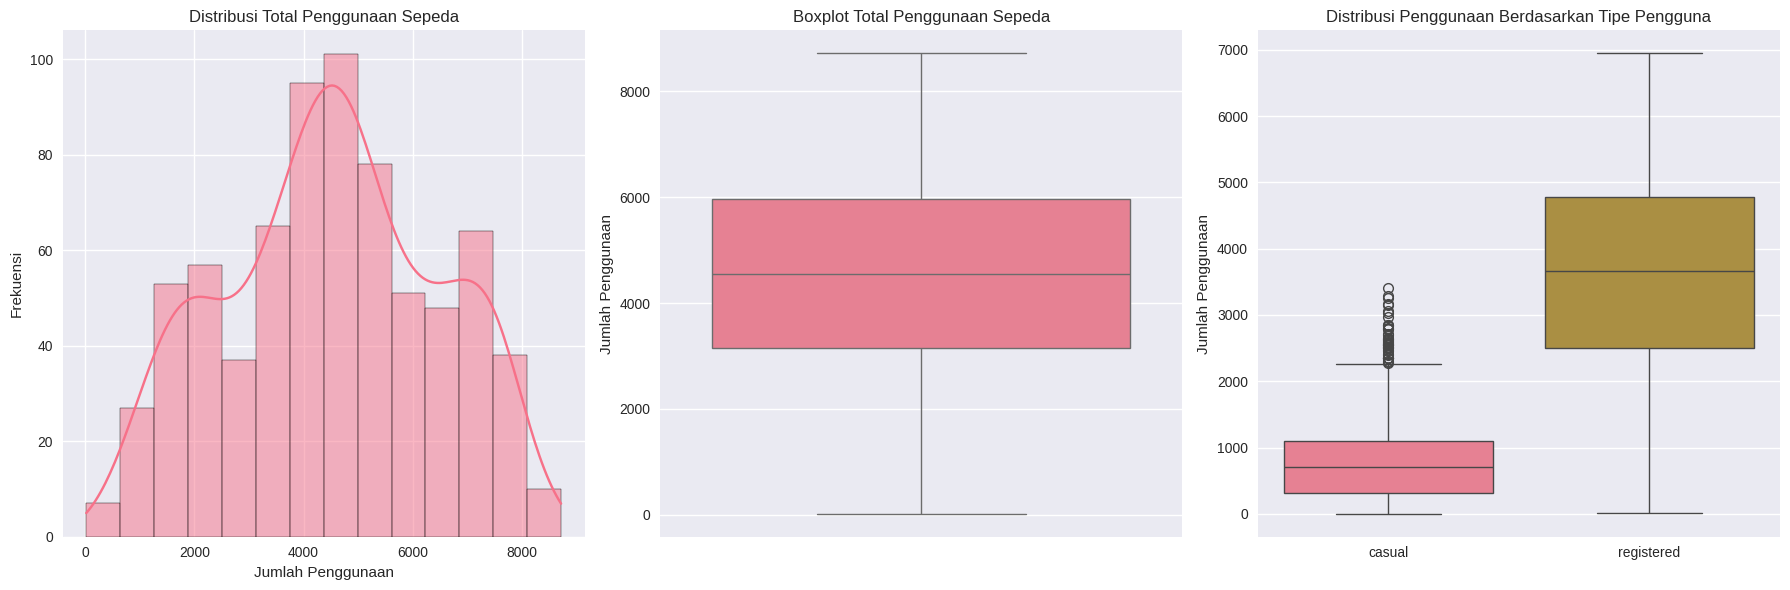

In [24]:
# Melihat statistik deskriptif dari jumlah penggunaan sepeda
print("Statistik deskriptif jumlah penggunaan sepeda (daily):")
desc_stats = day_df[['cnt', 'casual', 'registered']].describe()
print(desc_stats)

# Membuat visualisasi distribusi penggunaan sepeda
plt.figure(figsize=(18, 6))

# Histogram penggunaan sepeda
plt.subplot(1, 3, 1)
sns.histplot(day_df['cnt'], kde=True)
plt.title('Distribusi Total Penggunaan Sepeda')
plt.xlabel('Jumlah Penggunaan')
plt.ylabel('Frekuensi')

# Boxplot penggunaan sepeda
plt.subplot(1, 3, 2)
sns.boxplot(y=day_df['cnt'])
plt.title('Boxplot Total Penggunaan Sepeda')
plt.ylabel('Jumlah Penggunaan')

# Distribusi penggunaan berdasarkan tipe pengguna
plt.subplot(1, 3, 3)
sns.boxplot(data=day_df[['casual', 'registered']])
plt.title('Distribusi Penggunaan Berdasarkan Tipe Pengguna')
plt.ylabel('Jumlah Penggunaan')

plt.tight_layout()
plt.show()

**Insight dari Analisis Distribusi:**
- Distribusi total penggunaan sepeda menunjukkan pola yang cenderung normal dengan sedikit skewness positif
- Terdapat beberapa outlier dalam data penggunaan total, terutama pada nilai-nilai yang sangat tinggi
- Pengguna registered memiliki jumlah penggunaan yang jauh lebih tinggi dibandingkan pengguna casual
- Pengguna casual memiliki variasi (rentang) yang lebih kecil dibandingkan pengguna registered

### Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan waktu (musim, bulan, hari, jam) dan faktor cuaca?

#### 1.1 Analisis Penggunaan Berdasarkan Musim

Agregasi penggunaan sepeda berdasarkan musim:
    Musim  Jumlah Hari  Rata-rata Penggunaan  Total Penggunaan  Minimum  \
0    Fall          188           5644.303191           1061129     1115   
2  Summer          184           4992.331522            918589      795   
3  Winter          178           4728.162921            841613       22   
1  Spring          181           2604.132597            471348      431   

   Maksimum  
0      8714  
2      8362  
3      8555  
1      7836  


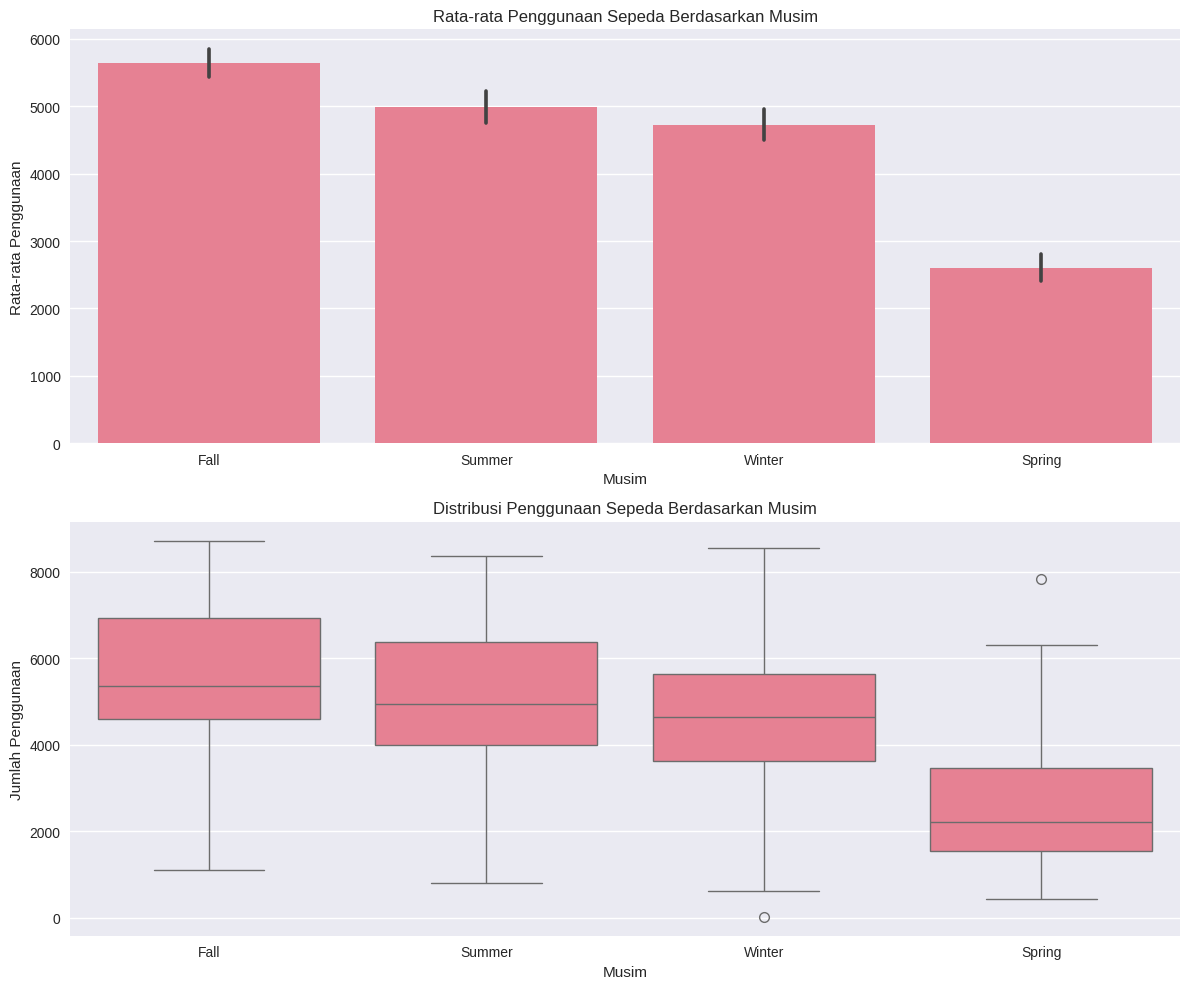

In [25]:
# Agregasi data berdasarkan musim
seasonal_usage = day_df.groupby('season')['cnt'].agg(['count', 'mean', 'sum', 'min', 'max']).reset_index()
seasonal_usage = seasonal_usage.sort_values(by='mean', ascending=False)
seasonal_usage.columns = ['Musim', 'Jumlah Hari', 'Rata-rata Penggunaan', 'Total Penggunaan', 'Minimum', 'Maksimum']
print("Agregasi penggunaan sepeda berdasarkan musim:")
print(seasonal_usage)

# Visualisasi penggunaan berdasarkan musim
plt.figure(figsize=(12, 10))

# Bar plot rata-rata penggunaan per musim
plt.subplot(2, 1, 1)
sns.barplot(x='season', y='cnt', data=day_df, order=['Fall', 'Summer', 'Winter', 'Spring'])
plt.title('Rata-rata Penggunaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penggunaan')

# Box plot distribusi penggunaan per musim
plt.subplot(2, 1, 2)
sns.boxplot(x='season', y='cnt', data=day_df, order=['Fall', 'Summer', 'Winter', 'Spring'])
plt.title('Distribusi Penggunaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penggunaan')

plt.tight_layout()
plt.show()

**Insight Penggunaan Berdasarkan Musim:**
- Musim Fall (Musim Gugur) memiliki rata-rata penggunaan sepeda tertinggi
- Musim Spring (Musim Semi) memiliki rata-rata penggunaan terendah
- Musim Fall juga memiliki nilai maksimum penggunaan tertinggi
- Distribusi penggunaan sepeda pada musim Summer (Musim Panas) dan Fall lebih luas, menunjukkan variasi yang lebih tinggi

#### 1.2 Analisis Penggunaan Berdasarkan Bulan

Agregasi penggunaan sepeda berdasarkan bulan:
        Bulan  Jumlah Hari  Rata-rata Penggunaan  Total Penggunaan  Minimum  \
4     January           62           2176.338710            134933      431   
3    February           57           2655.298246            151352     1005   
7       March           62           3692.258065            228920      605   
0       April           60           4484.900000            269094      795   
8         May           62           5349.774194            331686     2633   
6        June           60           5772.366667            346342     3767   
5        July           62           5563.677419            344948     3285   
1      August           62           5664.419355            351194     1115   
11  September           60           5766.516667            345991     1842   
10    October           62           5199.225806            322352       22   
9    November           60           4247.183333            254831     1495   
2    D

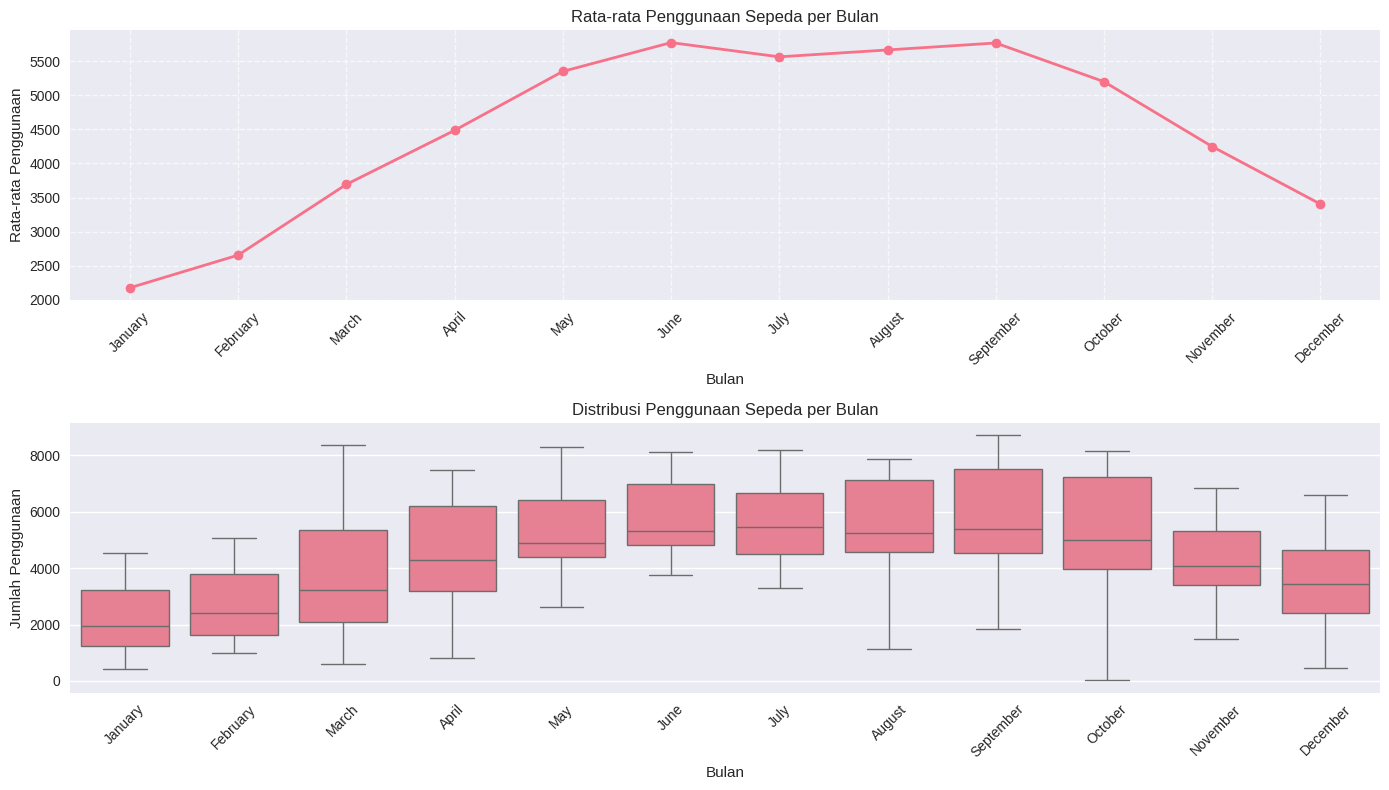

In [26]:
# Membuat kolom bulan dari tanggal
day_df['month'] = day_df['dteday'].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Agregasi data berdasarkan bulan
monthly_usage = day_df.groupby('month')['cnt'].agg(['count', 'mean', 'sum', 'min', 'max']).reset_index()
# Urutkan bulan secara kronologis
monthly_usage['month'] = pd.Categorical(monthly_usage['month'], categories=month_order, ordered=True)
monthly_usage = monthly_usage.sort_values('month')
monthly_usage.columns = ['Bulan', 'Jumlah Hari', 'Rata-rata Penggunaan', 'Total Penggunaan', 'Minimum', 'Maksimum']
print("Agregasi penggunaan sepeda berdasarkan bulan:")
print(monthly_usage)

# Visualisasi penggunaan berdasarkan bulan
plt.figure(figsize=(14, 8))

# Line plot rata-rata penggunaan per bulan
plt.subplot(2, 1, 1)
monthly_avg = day_df.groupby('month')['cnt'].mean().reindex(month_order)
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linewidth=2)
plt.title('Rata-rata Penggunaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penggunaan')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Box plot distribusi penggunaan per bulan
plt.subplot(2, 1, 2)
day_df['month'] = pd.Categorical(day_df['month'], categories=month_order, ordered=True)
sns.boxplot(x='month', y='cnt', data=day_df)
plt.title('Distribusi Penggunaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penggunaan')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Insight Penggunaan Berdasarkan Bulan:**
- Terdapat pola yang jelas dalam penggunaan sepeda berdasarkan bulan
- Bulan September memiliki rata-rata penggunaan tertinggi, diikuti oleh Juni dan Agustus
- Bulan Januari memiliki rata-rata penggunaan terendah, diikuti oleh Desember dan Februari
- Terjadi peningkatan penggunaan dari musim dingin ke musim panas, dengan puncak pada bulan-bulan musim gugur
- Distribusi penggunaan lebih luas pada bulan-bulan dengan rata-rata penggunaan tinggi

#### 1.3 Analisis Penggunaan Berdasarkan Hari dalam Seminggu

Agregasi penggunaan sepeda berdasarkan hari:
        Hari  Jumlah Data  Rata-rata Penggunaan  Total Penggunaan  Minimum  \
1     Monday          105           4338.123810            455503       22   
5    Tuesday          104           4510.663462            469109      683   
6  Wednesday          104           4548.538462            473048      441   
4   Thursday          104           4667.259615            485395      431   
0     Friday          104           4690.288462            487790     1167   
2   Saturday          105           4550.542857            477807      627   
3     Sunday          105           4228.828571            444027      605   

   Maksimum  
1      7525  
5      7767  
6      8173  
4      7804  
0      8362  
2      8714  
3      8227  


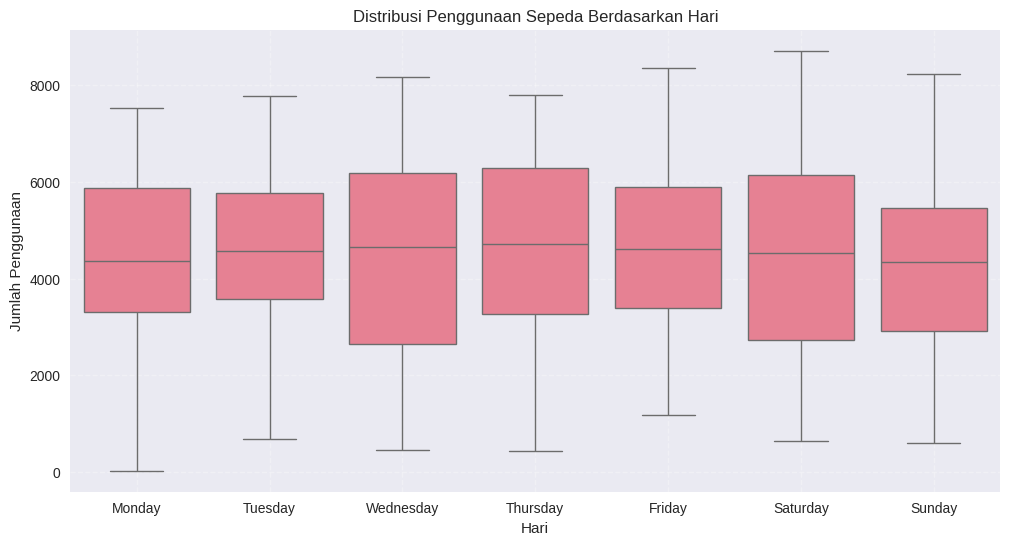

In [27]:
# Membuat kolom hari
day_df['weekday_name'] = day_df['weekday'].map({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
})
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Agregasi data berdasarkan hari
weekday_usage = day_df.groupby('weekday_name')['cnt'].agg(['count', 'mean', 'sum', 'min', 'max']).reset_index()
weekday_usage['weekday_name'] = pd.Categorical(weekday_usage['weekday_name'], categories=weekday_order, ordered=True)
weekday_usage = weekday_usage.sort_values('weekday_name')
weekday_usage.columns = ['Hari', 'Jumlah Data', 'Rata-rata Penggunaan', 'Total Penggunaan', 'Minimum', 'Maksimum']
print("Agregasi penggunaan sepeda berdasarkan hari:")
print(weekday_usage)

# Visualisasi penggunaan berdasarkan hari
plt.figure(figsize=(12, 6))
day_df['weekday_name'] = pd.Categorical(day_df['weekday_name'], categories=weekday_order, ordered=True)
sns.boxplot(x='weekday_name', y='cnt', data=day_df)
plt.title('Distribusi Penggunaan Sepeda Berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penggunaan')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

**Insight Penggunaan Berdasarkan Hari:**
- Tidak terdapat perbedaan yang sangat signifikan dalam rata-rata penggunaan sepeda antar hari dalam seminggu
- Hari kerja (Senin-Jumat) memiliki pola penggunaan yang relatif konsisten
- Akhir pekan (Sabtu-Minggu) memiliki distribusi penggunaan yang sedikit berbeda dengan hari kerja
- Penggunaan pada hari Sabtu cenderung lebih tinggi dibandingkan hari Minggu

#### 1.4 Analisis Penggunaan Berdasarkan Jam

Agregasi penggunaan sepeda berdasarkan jam:
    Jam  Jumlah Data  Rata-rata Penggunaan  Total Penggunaan  Minimum  \
0     0          726             53.898072             39130        2   
1     1          724             33.375691             24164        1   
2     2          715             22.869930             16352        1   
3     3          697             11.727403              8174        1   
4     4          697              6.352941              4428        1   
5     5          717             19.889819             14261        1   
6     6          725             76.044138             55132        1   
7     7          727            212.064649            154171        1   
8     8          727            359.011004            261001        5   
9     9          727            219.309491            159438       14   
10   10          727            173.668501            126257        8   
11   11          727            208.143054            151320       10   
12   12

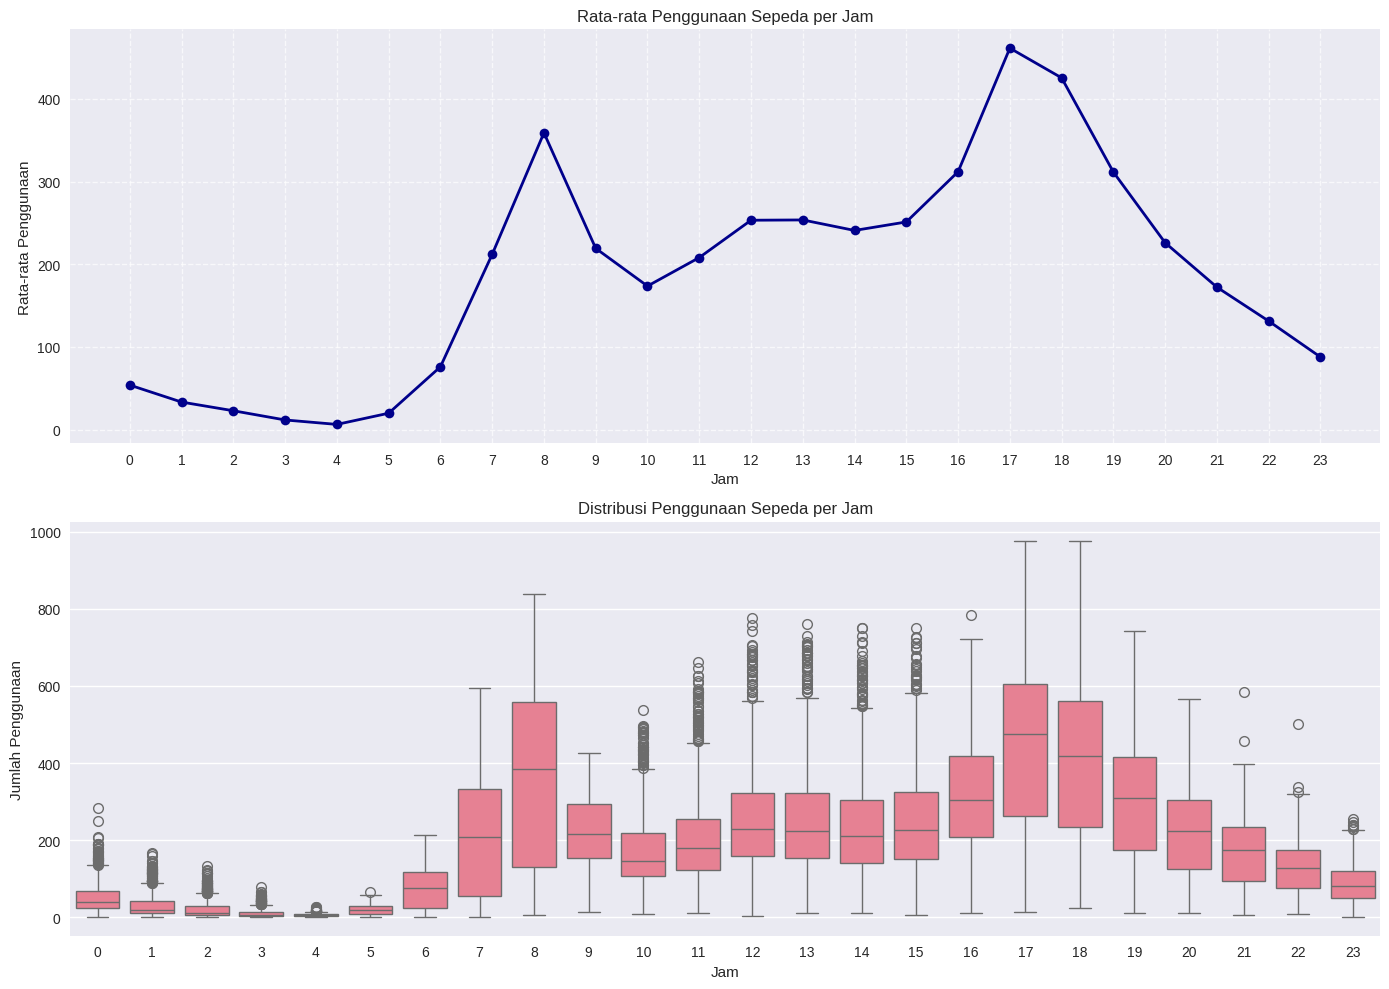

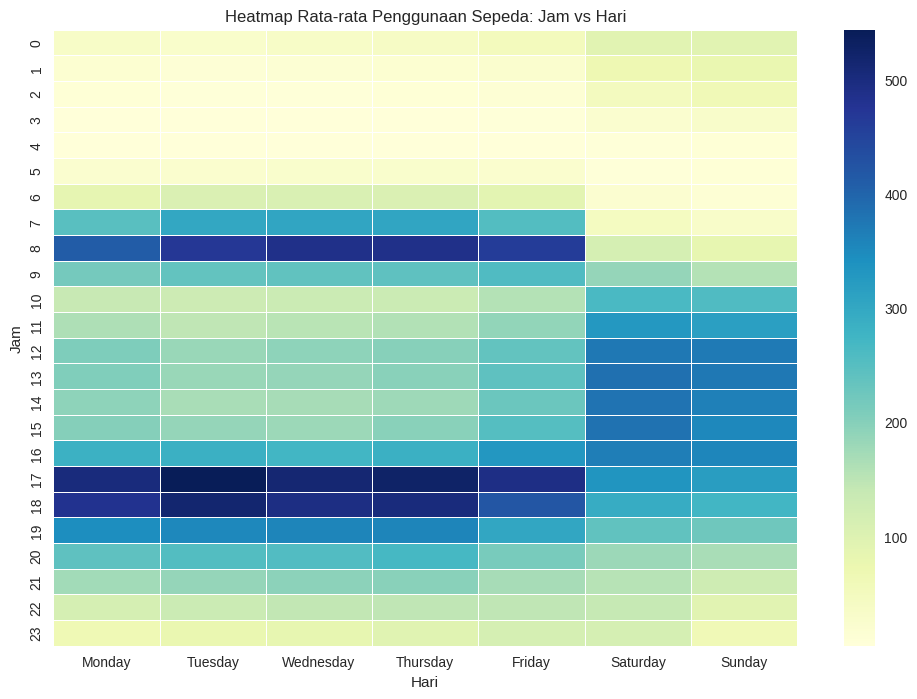

In [28]:
# Agregasi data berdasarkan jam
hourly_usage = hour_df.groupby('hr')['cnt'].agg(['count', 'mean', 'sum', 'min', 'max']).reset_index()
hourly_usage.columns = ['Jam', 'Jumlah Data', 'Rata-rata Penggunaan', 'Total Penggunaan', 'Minimum', 'Maksimum']
print("Agregasi penggunaan sepeda berdasarkan jam:")
print(hourly_usage)

# Visualisasi penggunaan berdasarkan jam
plt.figure(figsize=(14, 10))

# Line plot rata-rata penggunaan per jam
plt.subplot(2, 1, 1)
hourly_mean = hour_df.groupby('hr')['cnt'].mean()
plt.plot(hourly_mean.index, hourly_mean.values, marker='o', linewidth=2, color='darkblue')
plt.title('Rata-rata Penggunaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penggunaan')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)

# Box plot distribusi penggunaan per jam
plt.subplot(2, 1, 2)
sns.boxplot(x='hr', y='cnt', data=hour_df)
plt.title('Distribusi Penggunaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penggunaan')
plt.xticks(range(0, 24))

plt.tight_layout()
plt.show()

# Visualisasi heatmap penggunaan berdasarkan jam dan hari
hour_df['weekday_name'] = hour_df['weekday'].map({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
})

# Membuat pivot table untuk heatmap (jam vs hari)
hour_day_pivot = hour_df.pivot_table(
    index='hr',
    columns='weekday_name',
    values='cnt',
    aggfunc='mean'
)

# Mengurutkan kolom berdasarkan hari dalam seminggu
hour_day_pivot = hour_day_pivot[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

plt.figure(figsize=(12, 8))
sns.heatmap(hour_day_pivot, cmap='YlGnBu', annot=False, fmt=".0f", linewidths=.5)
plt.title('Heatmap Rata-rata Penggunaan Sepeda: Jam vs Hari')
plt.ylabel('Jam')
plt.xlabel('Hari')
plt.show()

**Insight Penggunaan Berdasarkan Jam:**
- Terdapat dua puncak penggunaan sepeda yang jelas: pagi hari (8-9) dan sore hari (17-18)
- Puncak pagi dan sore menunjukkan pola penggunaan untuk komuting ke/dari tempat kerja/sekolah
- Penggunaan terendah terjadi pada dini hari (1-4)
- Terdapat penggunaan moderat pada siang hari (11-15)
- Pola penggunaan berbeda antara hari kerja dan akhir pekan, dengan puncak pagi hari terlihat jelas pada hari kerja
- Akhir pekan memiliki pola yang lebih merata sepanjang hari (10-19) tanpa puncak yang tajam

#### 1.5 Analisis Penggunaan Berdasarkan Faktor Cuaca

Agregasi penggunaan sepeda berdasarkan kondisi cuaca:
     Kondisi Cuaca  Jumlah Hari  Rata-rata Penggunaan  Total Penggunaan  \
0            Clear          463           4876.786177           2257952   
2             Mist          247           4035.862348            996858   
1  Light Snow/Rain           21           1803.285714             37869   

   Minimum  Maksimum  
0      431      8714  
2      605      8362  
1       22      4639  


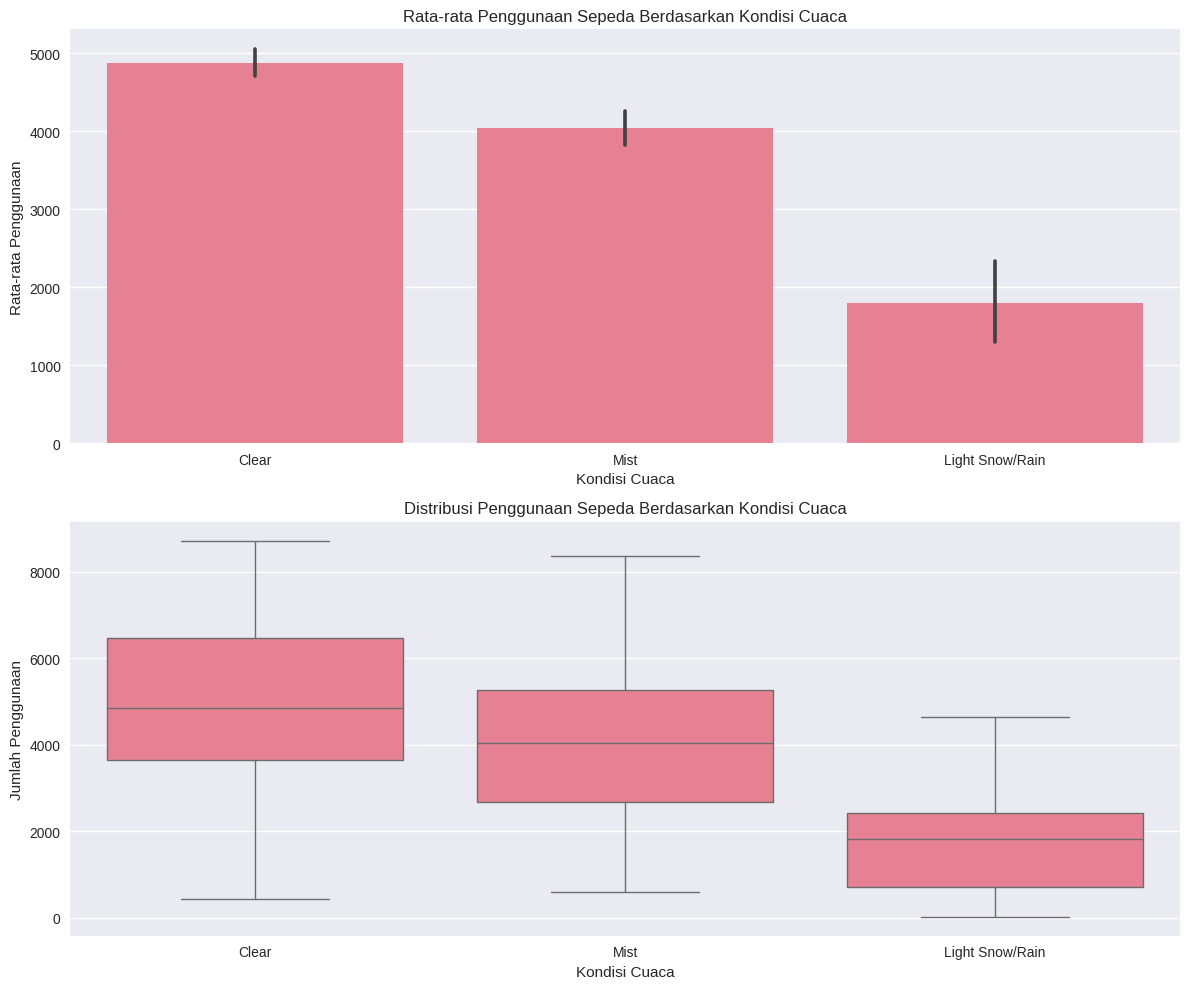

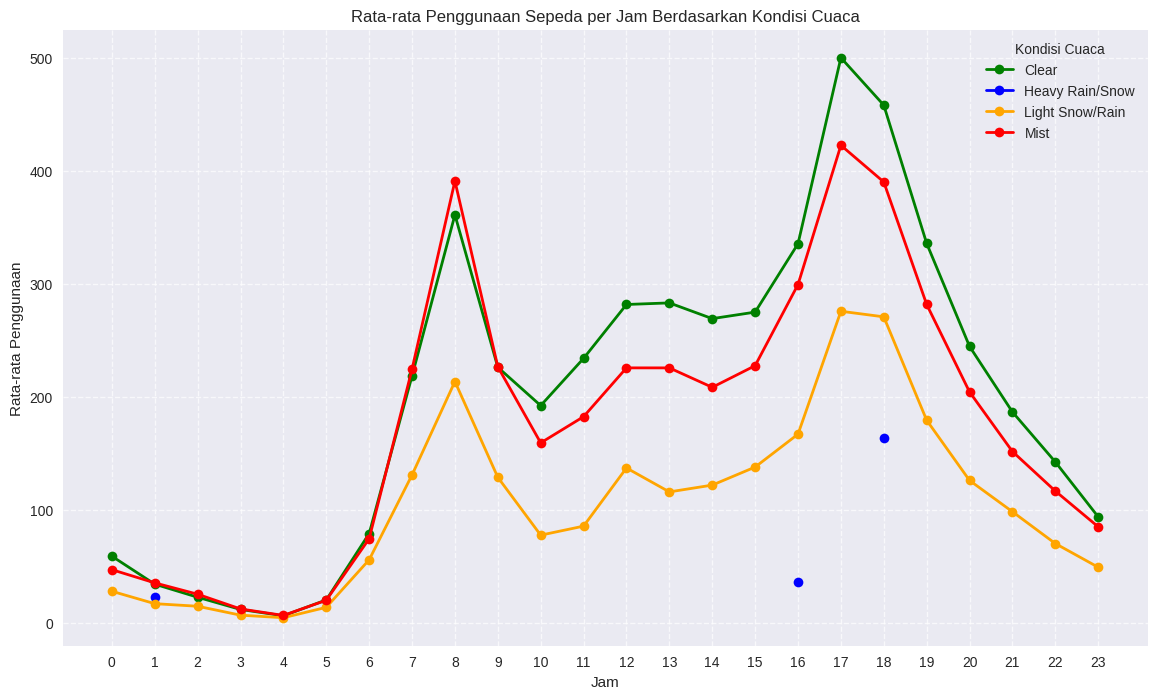

In [29]:
# Agregasi data berdasarkan kondisi cuaca
weather_usage = day_df.groupby('weathersit')['cnt'].agg(['count', 'mean', 'sum', 'min', 'max']).reset_index()
weather_usage = weather_usage.sort_values(by='mean', ascending=False)
weather_usage.columns = ['Kondisi Cuaca', 'Jumlah Hari', 'Rata-rata Penggunaan', 'Total Penggunaan', 'Minimum', 'Maksimum']
print("Agregasi penggunaan sepeda berdasarkan kondisi cuaca:")
print(weather_usage)

# Visualisasi penggunaan berdasarkan kondisi cuaca
plt.figure(figsize=(12, 10))

# Bar plot rata-rata penggunaan per kondisi cuaca
plt.subplot(2, 1, 1)
weather_order = weather_usage['Kondisi Cuaca'].tolist()
sns.barplot(x='weathersit', y='cnt', data=day_df, order=weather_order)
plt.title('Rata-rata Penggunaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Penggunaan')

# Box plot distribusi penggunaan per kondisi cuaca
plt.subplot(2, 1, 2)
sns.boxplot(x='weathersit', y='cnt', data=day_df, order=weather_order)
plt.title('Distribusi Penggunaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penggunaan')

plt.tight_layout()
plt.show()

# Analisis hubungan cuaca dengan penggunaan sepeda per jam
hourly_weather_usage = hour_df.groupby(['weathersit', 'hr'])['cnt'].mean().reset_index()
hourly_weather_pivot = hourly_weather_usage.pivot(index='hr', columns='weathersit', values='cnt')

plt.figure(figsize=(14, 8))
for weather, color in zip(hourly_weather_pivot.columns, ['green', 'blue', 'orange', 'red']):
    plt.plot(hourly_weather_pivot.index, hourly_weather_pivot[weather], marker='o', linewidth=2, label=weather, color=color)
plt.title('Rata-rata Penggunaan Sepeda per Jam Berdasarkan Kondisi Cuaca')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penggunaan')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Kondisi Cuaca')
plt.show()

**Insight Pengaruh Cuaca:**
- Cuaca cerah (Clear) memiliki rata-rata penggunaan sepeda tertinggi
- Penggunaan menurun signifikan saat cuaca hujan atau salju ringan
- Cuaca ekstrem (Heavy Rain/Snow) memiliki dampak paling besar terhadap penurunan penggunaan
- Kondisi berkabut (Mist) hanya memberikan dampak minimal terhadap penggunaan sepeda
- Pola penggunaan berdasarkan jam tetap terlihat (puncak pagi dan sore) meskipun dalam kondisi cuaca yang berbeda, tetapi dengan intensitas yang lebih rendah saat cuaca buruk
- Perbedaan penggunaan antara cuaca cerah dan cuaca buruk lebih signifikan pada jam-jam puncak

#### 1.6 Analisis Penggunaan Berdasarkan Suhu, Kelembaban, dan Kecepatan Angin

Korelasi antar variabel numerik:
cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
temp          0.627494
hum          -0.100659
windspeed    -0.234545
Name: cnt, dtype: float64


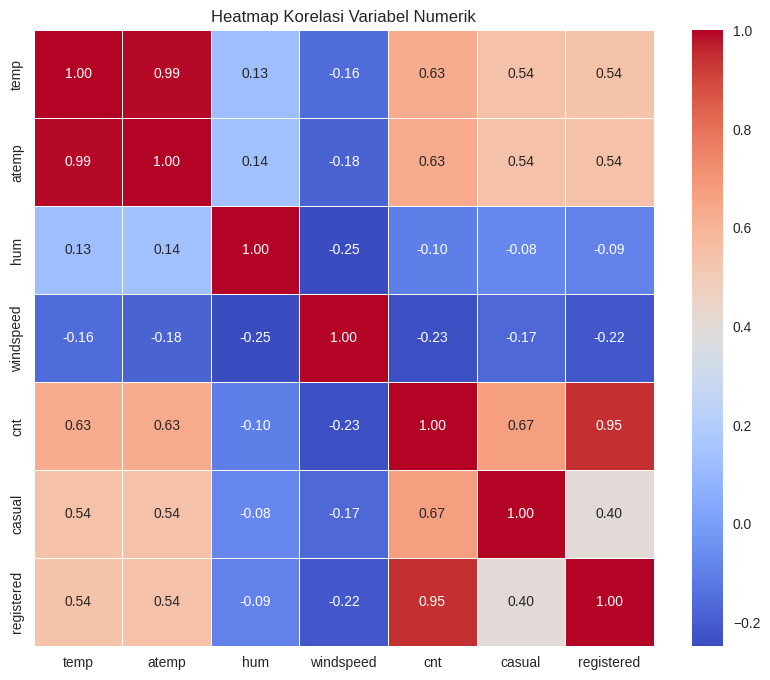

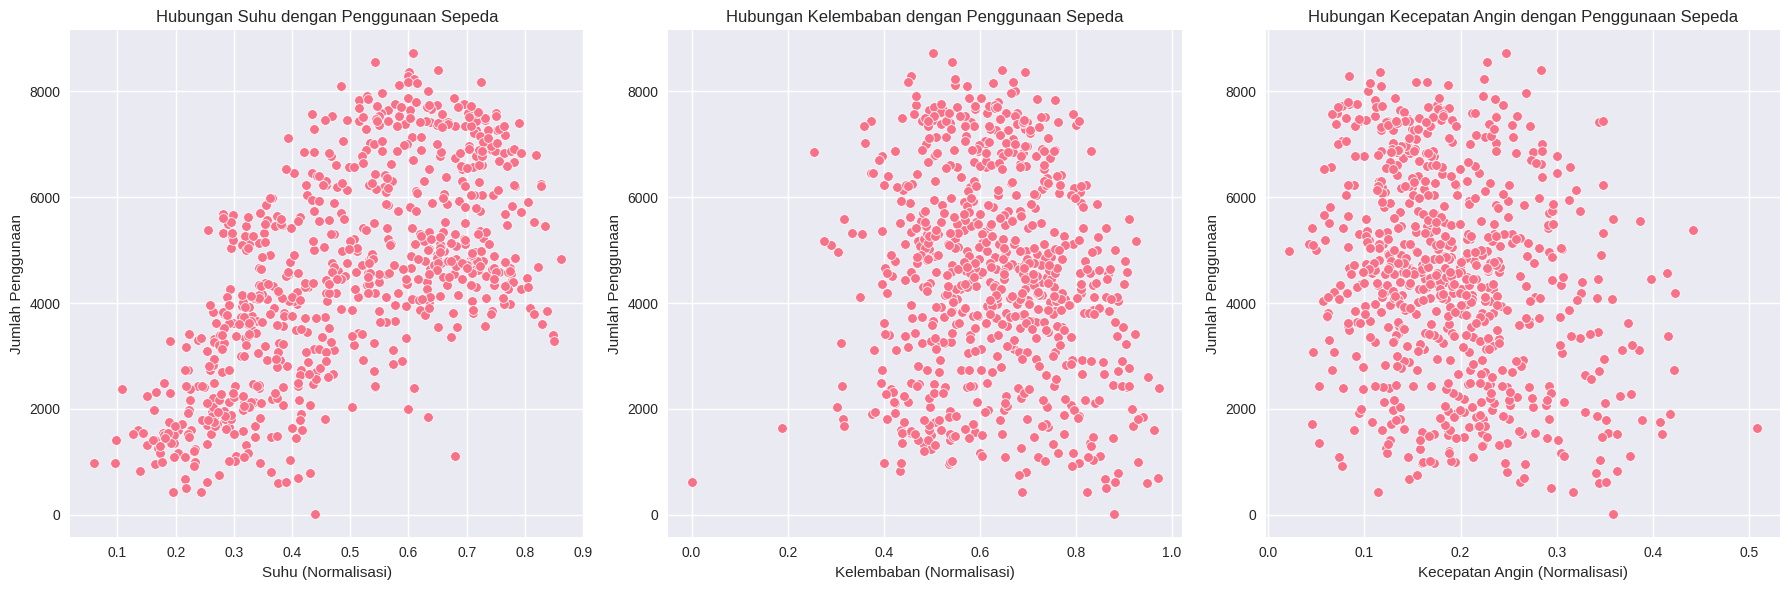

In [30]:
# Membuat dataframe untuk analisis korelasi
numeric_df = day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'casual', 'registered']]

# Menghitung korelasi
correlation = numeric_df.corr()
print("Korelasi antar variabel numerik:")
print(correlation['cnt'].sort_values(ascending=False))

# Visualisasi korelasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

# Visualisasi hubungan suhu dengan penggunaan sepeda
plt.figure(figsize=(18, 6))

# Scatter plot suhu vs penggunaan
plt.subplot(1, 3, 1)
sns.scatterplot(x='temp', y='cnt', data=day_df)
plt.title('Hubungan Suhu dengan Penggunaan Sepeda')
plt.xlabel('Suhu (Normalisasi)')
plt.ylabel('Jumlah Penggunaan')

# Scatter plot kelembaban vs penggunaan
plt.subplot(1, 3, 2)
sns.scatterplot(x='hum', y='cnt', data=day_df)
plt.title('Hubungan Kelembaban dengan Penggunaan Sepeda')
plt.xlabel('Kelembaban (Normalisasi)')
plt.ylabel('Jumlah Penggunaan')

# Scatter plot kecepatan angin vs penggunaan
plt.subplot(1, 3, 3)
sns.scatterplot(x='windspeed', y='cnt', data=day_df)
plt.title('Hubungan Kecepatan Angin dengan Penggunaan Sepeda')
plt.xlabel('Kecepatan Angin (Normalisasi)')
plt.ylabel('Jumlah Penggunaan')

plt.tight_layout()
plt.show()

**Insight Faktor Cuaca Tambahan:**
- Suhu (temp) memiliki korelasi positif yang kuat dengan jumlah penggunaan sepeda (0.63)
- Kelembaban (hum) memiliki korelasi negatif dengan penggunaan sepeda (-0.10)
- Kecepatan angin (windspeed) juga memiliki korelasi negatif dengan penggunaan sepeda (-0.23)
- Penggunaan sepeda cenderung meningkat pada suhu yang lebih tinggi
- Penggunaan sepeda cenderung menurun pada kelembaban yang tinggi atau kecepatan angin yang tinggi
- Suhu terasa (atemp) dan suhu sebenarnya (temp) memiliki pola yang sangat mirip dalam pengaruhnya terhadap penggunaan sepeda

### Pertanyaan 2: Bagaimana perbandingan antara pengguna casual dan registered dalam sistem bike sharing?

#### 2.1 Perbandingan Jumlah Pengguna Casual vs Registered

Total penggunaan berdasarkan tipe pengguna:
casual         620017
registered    2672662
cnt           3292679
dtype: int64

Rata-rata penggunaan harian berdasarkan tipe pengguna:
casual         848.176471
registered    3656.172367
cnt           4504.348837
dtype: float64

Persentase pengguna casual: 18.83%
Persentase pengguna registered: 81.17%


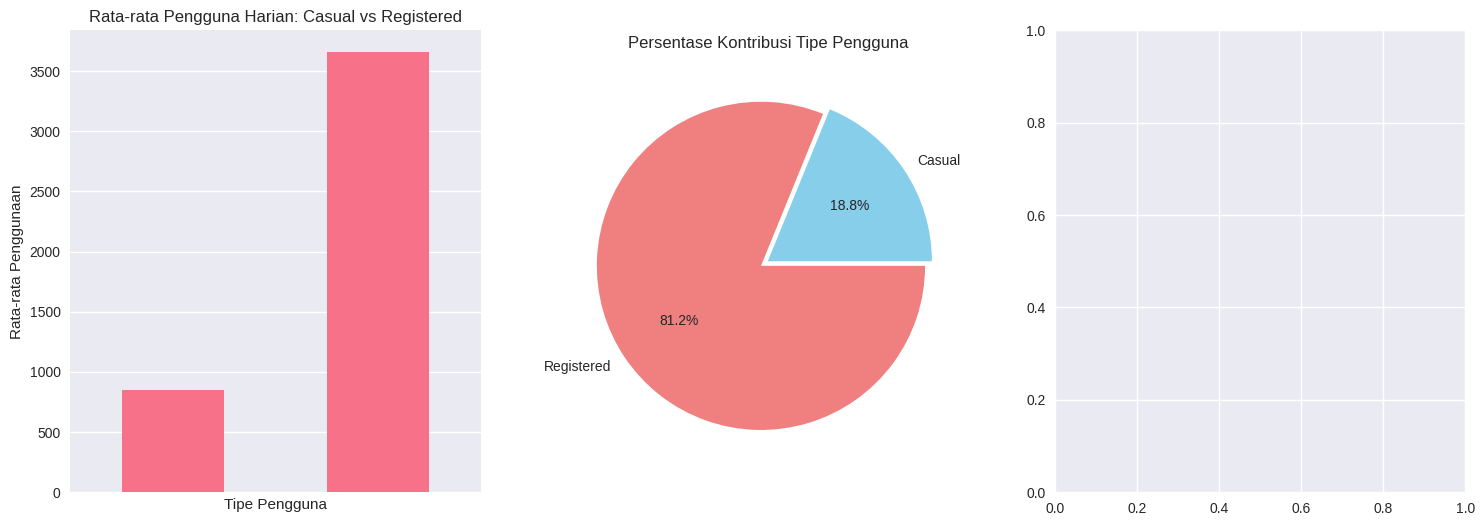

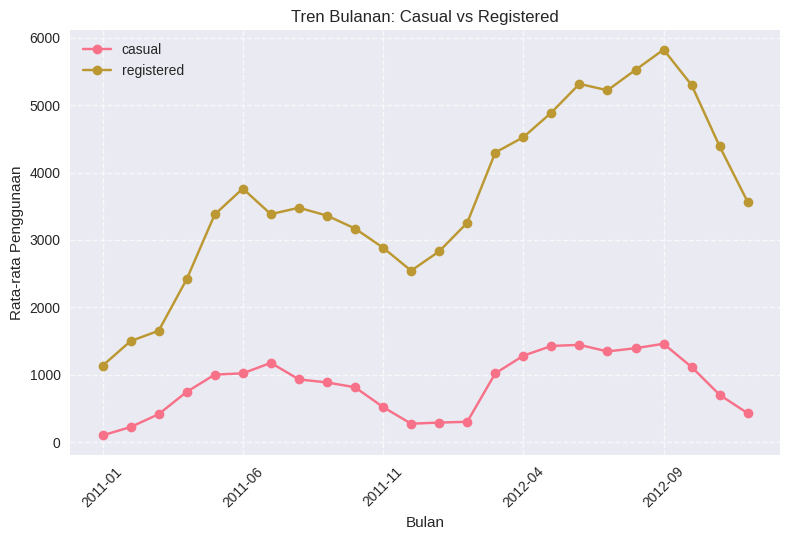

In [31]:
# Menghitung total dan rata-rata pengguna
user_comparison = day_df[['casual', 'registered', 'cnt']].sum()
print("Total penggunaan berdasarkan tipe pengguna:")
print(user_comparison)

user_avg_comparison = day_df[['casual', 'registered', 'cnt']].mean()
print("\nRata-rata penggunaan harian berdasarkan tipe pengguna:")
print(user_avg_comparison)

# Menghitung persentase kontribusi masing-masing tipe pengguna
total_casual = day_df['casual'].sum()
total_registered = day_df['registered'].sum()
total_usage = day_df['cnt'].sum()

casual_percentage = (total_casual / total_usage) * 100
registered_percentage = (total_registered / total_usage) * 100

print(f"\nPersentase pengguna casual: {casual_percentage:.2f}%")
print(f"Persentase pengguna registered: {registered_percentage:.2f}%")

# Visualisasi perbandingan tipe pengguna
plt.figure(figsize=(18, 6))

# Bar plot perbandingan rata-rata pengguna
plt.subplot(1, 3, 1)
comparison_data = user_avg_comparison[['casual', 'registered']]
comparison_data.plot(kind='bar')
plt.title('Rata-rata Pengguna Harian: Casual vs Registered')
plt.xlabel('Tipe Pengguna')
plt.ylabel('Rata-rata Penggunaan')
plt.xticks([])

# Pie chart persentase kontribusi
plt.subplot(1, 3, 2)
plt.pie([casual_percentage, registered_percentage],
        labels=['Casual', 'Registered'],
        autopct='%1.1f%%',
        colors=['skyblue', 'lightcoral'],
        explode=(0, 0.05))
plt.title('Persentase Kontribusi Tipe Pengguna')

# Time series plot casual vs registered
plt.subplot(1, 3, 3)
# Mengambil data bulanan untuk visualisasi
monthly_users = day_df.groupby(day_df['dteday'].dt.to_period('M'))[['casual', 'registered']].mean()
monthly_users.index = monthly_users.index.astype(str)
monthly_users.plot(kind='line', marker='o')
plt.title('Tren Bulanan: Casual vs Registered')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penggunaan')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Insight Perbandingan Tipe Pengguna:**
- Pengguna registered mendominasi sistem dengan rata-rata penggunaan hampir 4 kali lipat dari pengguna casual
- Pengguna registered berkontribusi sekitar 80% dari total penggunaan, sementara pengguna casual hanya sekitar 20%
- Terdapat pola musiman yang jelas pada kedua tipe pengguna, dengan peningkatan penggunaan pada musim panas dan musim gugur
- Fluktuasi penggunaan pada pengguna casual terlihat lebih dramatis dibandingkan pengguna registered yang lebih stabil

#### 2.2 Pola Penggunaan Casual vs Registered Berdasarkan Hari dalam Seminggu

/tmp/ipykernel_45474/1424676728.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_user_type = day_df.groupby('weekday_name')[['casual', 'registered']].mean().reset_index()


Rata-rata penggunaan berdasarkan tipe pengguna dan hari:
  weekday_name       casual   registered
0       Monday   674.133333  3663.990476
1      Tuesday   556.182692  3954.480769
2    Wednesday   551.144231  3997.394231
3     Thursday   590.961538  4076.298077
4       Friday   752.288462  3938.000000
5     Saturday  1465.257143  3085.285714
6       Sunday  1338.295238  2890.533333


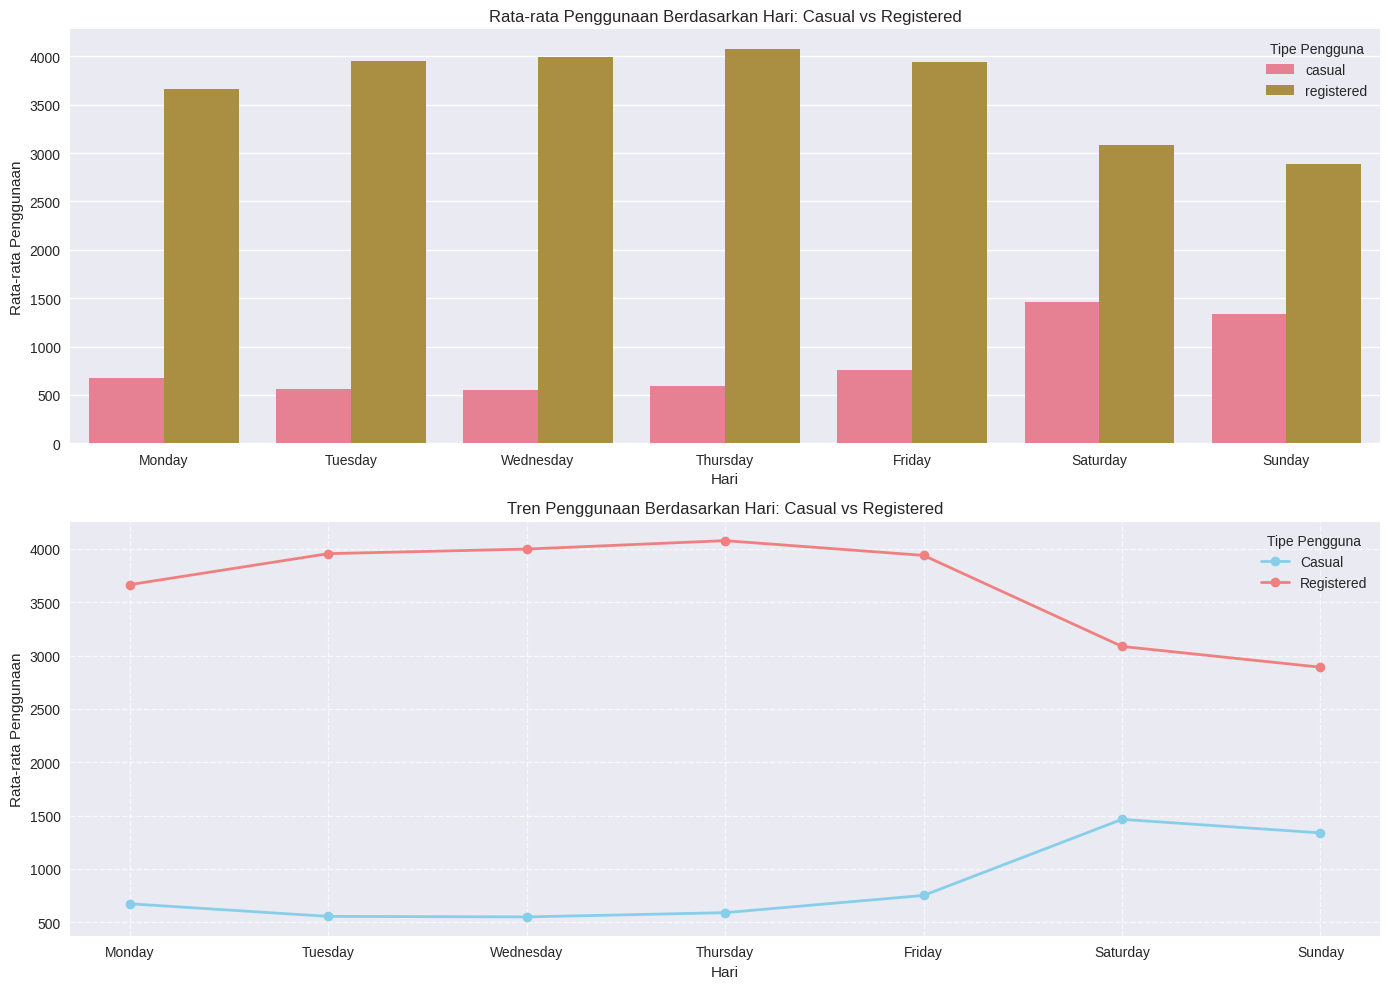

In [32]:
# Agregasi berdasarkan hari
day_user_type = day_df.groupby('weekday_name')[['casual', 'registered']].mean().reset_index()
day_user_type['weekday_name'] = pd.Categorical(day_user_type['weekday_name'],
                                             categories=weekday_order,
                                             ordered=True)
day_user_type = day_user_type.sort_values('weekday_name')
print("Rata-rata penggunaan berdasarkan tipe pengguna dan hari:")
print(day_user_type)

# Reshape data untuk visualisasi
day_user_melted = day_user_type.melt(
    id_vars='weekday_name',
    value_vars=['casual', 'registered'],
    var_name='user_type',
    value_name='count'
)

# Visualisasi pola penggunaan per hari
plt.figure(figsize=(14, 10))

# Bar plot penggunaan per hari dan tipe pengguna
plt.subplot(2, 1, 1)
sns.barplot(x='weekday_name', y='count', hue='user_type', data=day_user_melted)
plt.title('Rata-rata Penggunaan Berdasarkan Hari: Casual vs Registered')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Penggunaan')
plt.legend(title='Tipe Pengguna')

# Line plot untuk melihat tren
plt.subplot(2, 1, 2)
pivoted_day = day_user_melted.pivot(index='weekday_name', columns='user_type', values='count')
pivoted_day = pivoted_day.reindex(weekday_order)
plt.plot(pivoted_day.index, pivoted_day['casual'], marker='o', linewidth=2, label='Casual', color='skyblue')
plt.plot(pivoted_day.index, pivoted_day['registered'], marker='o', linewidth=2, label='Registered', color='lightcoral')
plt.title('Tren Penggunaan Berdasarkan Hari: Casual vs Registered')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Penggunaan')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Tipe Pengguna')

plt.tight_layout()
plt.show()

**Insight Pola Penggunaan Berdasarkan Hari:**
- Pengguna registered memiliki penggunaan yang lebih tinggi pada hari kerja (Senin-Jumat)
- Pengguna casual menunjukkan peningkatan penggunaan pada akhir pekan (Sabtu-Minggu)
- Pola penggunaan pengguna registered sangat konsisten pada hari kerja
- Penggunaan tertinggi untuk pengguna casual terjadi pada hari Sabtu
- Hal ini mengindikasikan bahwa registered users cenderung menggunakan sepeda untuk komuting, sementara casual users lebih cenderung menggunakan sepeda untuk rekreasi di hari libur
- Perbedaan yang signifikan ini menunjukkan motivasi penggunaan yang berbeda antara kedua kelompok pengguna

#### 2.3 Pola Penggunaan Casual vs Registered Berdasarkan Jam

Rata-rata penggunaan berdasarkan tipe pengguna dan jam:
    hr     casual  registered
0    0  10.158402   43.739669
1    1   6.504144   26.871547
2    2   4.772028   18.097902
3    3   2.715925    9.011478
4    4   1.253945    5.098996
5    5   1.411437   18.478382
6    6   4.161379   71.882759
7    7  11.055021  201.009629
8    8  21.679505  337.331499
9    9  30.891334  188.418157
10  10  46.477304  127.191197
11  11  59.540578  148.602476
12  12  68.293956  185.021978
13  13  72.308642  181.352538
14  14  75.567901  165.381344
15  15  74.905350  176.327846
16  16  73.745205  238.238356
17  17  74.273973  387.178082
18  18  61.120879  364.390110
19  19  48.770604  262.752747
20  20  36.233516  189.796703
21  21  28.255495  144.059066
22  22  22.252747  109.082418
23  23  15.199176   72.631868


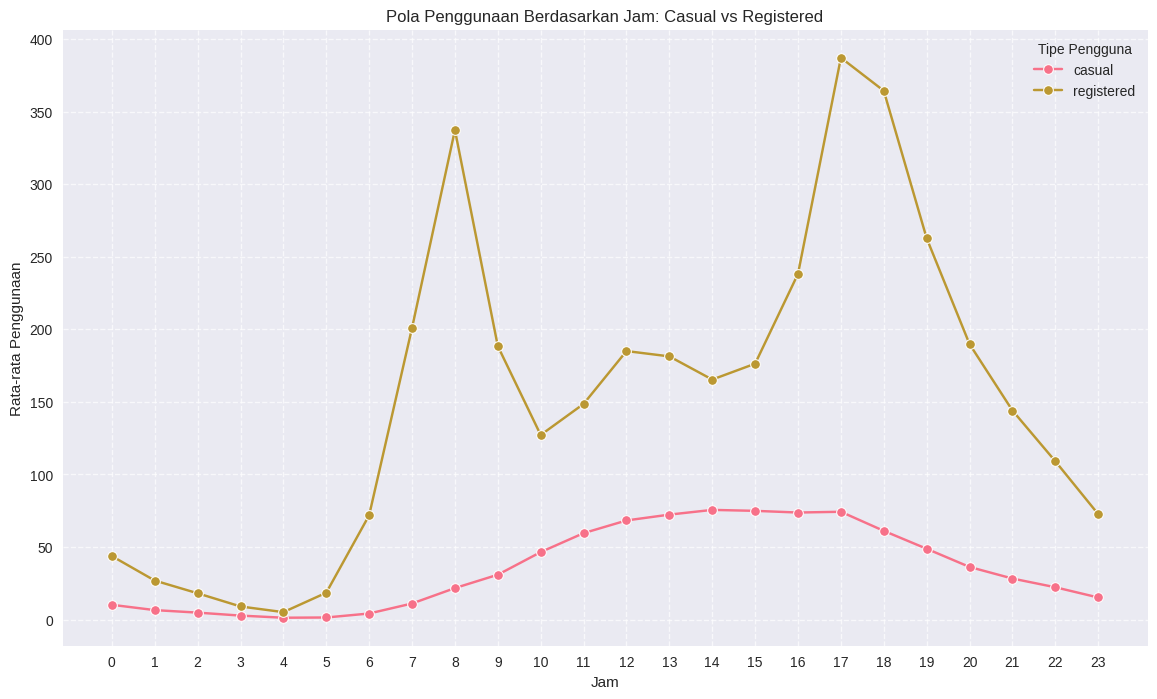

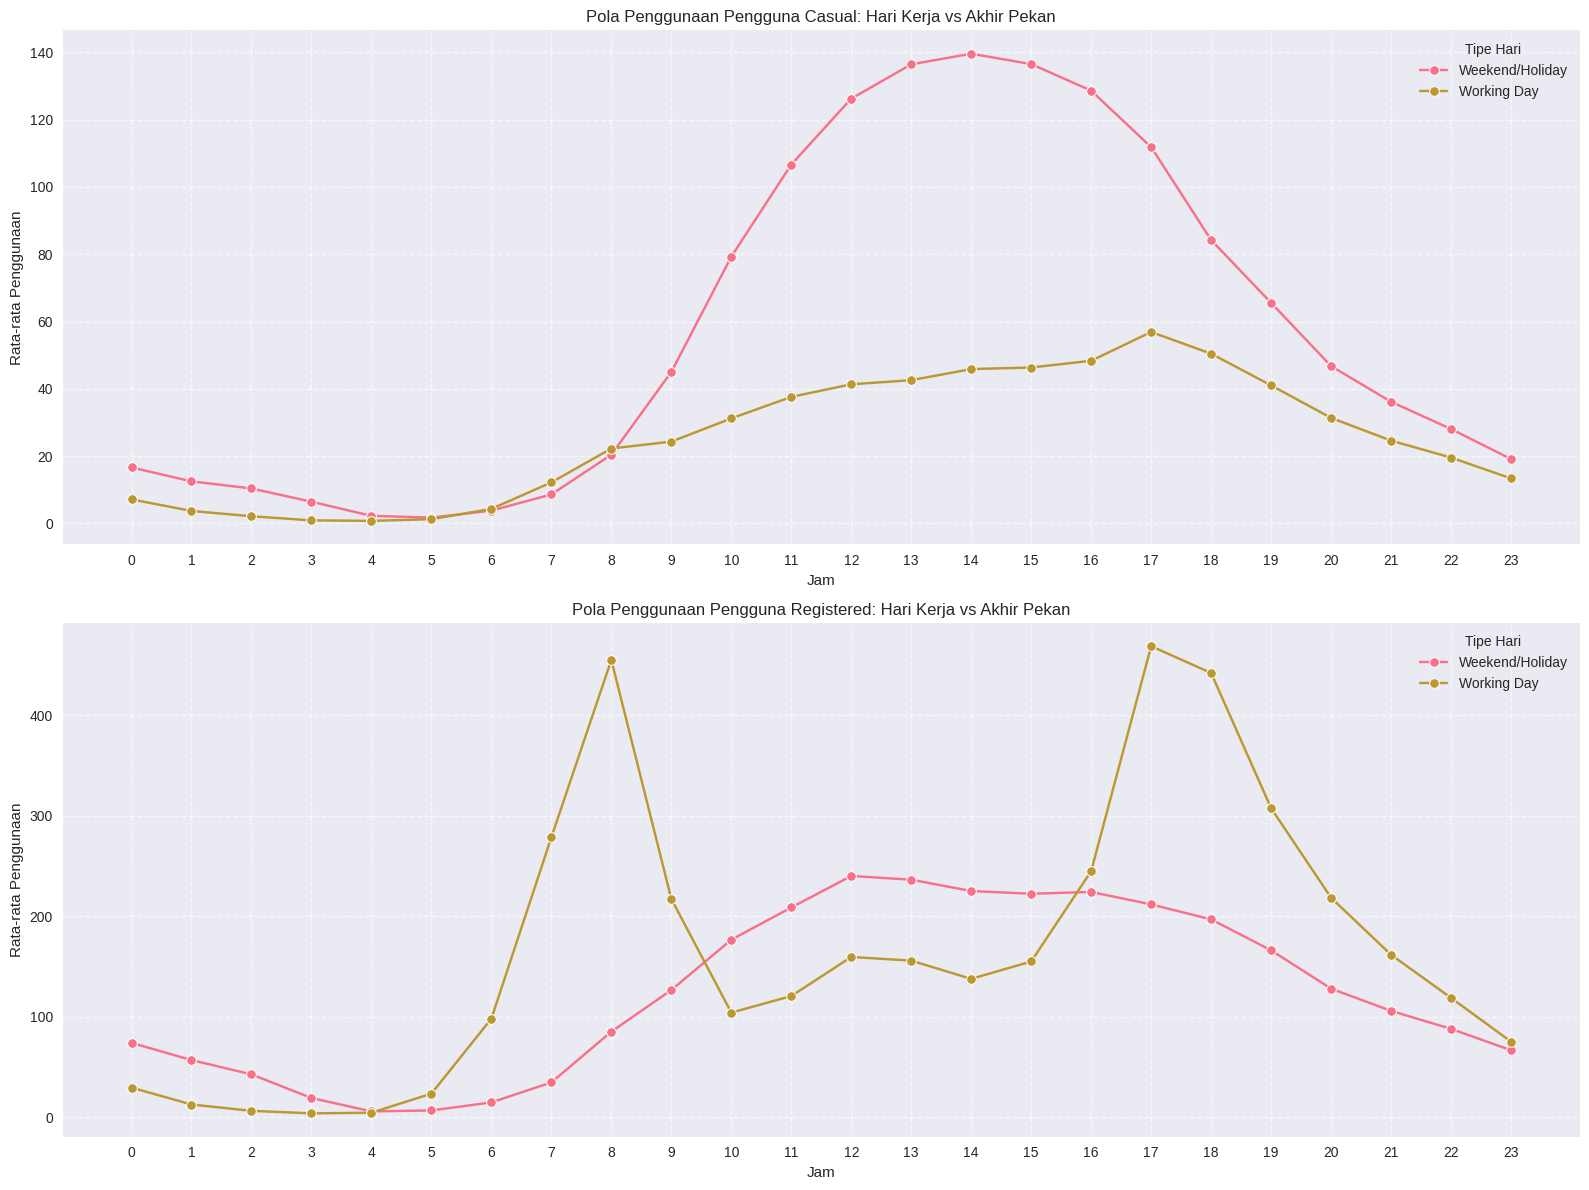

In [33]:
# Agregasi berdasarkan jam
hour_user_type = hour_df.groupby('hr')[['casual', 'registered']].mean().reset_index()
print("Rata-rata penggunaan berdasarkan tipe pengguna dan jam:")
print(hour_user_type)

# Reshape data untuk visualisasi
hour_user_melted = hour_user_type.melt(
    id_vars='hr',
    value_vars=['casual', 'registered'],
    var_name='user_type',
    value_name='count'
)

# Visualisasi pola penggunaan per jam
plt.figure(figsize=(14, 8))
sns.lineplot(x='hr', y='count', hue='user_type', data=hour_user_melted, marker='o')
plt.title('Pola Penggunaan Berdasarkan Jam: Casual vs Registered')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penggunaan')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Tipe Pengguna')
plt.show()

# Membedakan pola penggunaan pada hari kerja vs akhir pekan
workingday_hour_usage = hour_df.groupby(['workingday', 'hr'])[['casual', 'registered']].mean().reset_index()
workingday_hour_usage['day_type'] = workingday_hour_usage['workingday'].map({0: 'Weekend/Holiday', 1: 'Working Day'})

# Reshape data untuk visualisasi
workingday_hour_melted = workingday_hour_usage.melt(
    id_vars=['hr', 'day_type'],
    value_vars=['casual', 'registered'],
    var_name='user_type',
    value_name='count'
)

# Visualisasi pola penggunaan berdasarkan jam dan tipe hari
plt.figure(figsize=(16, 12))

# Visualisasi untuk pengguna casual
plt.subplot(2, 1, 1)
casual_data = workingday_hour_melted[workingday_hour_melted['user_type'] == 'casual']
sns.lineplot(x='hr', y='count', hue='day_type', data=casual_data, marker='o')
plt.title('Pola Penggunaan Pengguna Casual: Hari Kerja vs Akhir Pekan')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penggunaan')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Tipe Hari')

# Visualisasi untuk pengguna registered
plt.subplot(2, 1, 2)
registered_data = workingday_hour_melted[workingday_hour_melted['user_type'] == 'registered']
sns.lineplot(x='hr', y='count', hue='day_type', data=registered_data, marker='o')
plt.title('Pola Penggunaan Pengguna Registered: Hari Kerja vs Akhir Pekan')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penggunaan')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Tipe Hari')

plt.tight_layout()
plt.show()

**Insight Pola Penggunaan Berdasarkan Jam:**
- Pengguna registered menunjukkan pola komuting yang jelas dengan dua puncak signifikan pada jam 8 dan jam 17-18
- Pengguna casual memiliki pola yang berbeda dengan penggunaan tertinggi pada sore hari dan siang hari, tanpa puncak pagi yang signifikan
- Pada akhir pekan, pengguna casual memiliki penggunaan yang lebih tinggi dibandingkan hari kerja, dengan puncak pada siang hingga sore hari
- Pengguna registered tetap menunjukkan pola komuting pada hari kerja, tetapi memiliki pola yang lebih mirip dengan pengguna casual pada akhir pekan
- Perbedaan pola ini semakin menegaskan bahwa pengguna registered cenderung menggunakan sepeda untuk komuting, sementara pengguna casual lebih untuk rekreasi

#### 2.4 Pola Penggunaan Casual vs Registered Berdasarkan Musim dan Cuaca

Rata-rata penggunaan berdasarkan tipe pengguna dan musim:
   season       casual   registered
0    Fall  1202.611702  4441.691489
1  Spring   334.928177  2269.204420
2  Summer  1106.097826  3886.233696
3  Winter   729.112360  3999.050562

Rata-rata penggunaan berdasarkan tipe pengguna dan kondisi cuaca:
        weathersit      casual   registered
0            Clear  964.030238  3912.755940
1  Light Snow/Rain  185.476190  1617.809524
2             Mist  687.352227  3348.510121


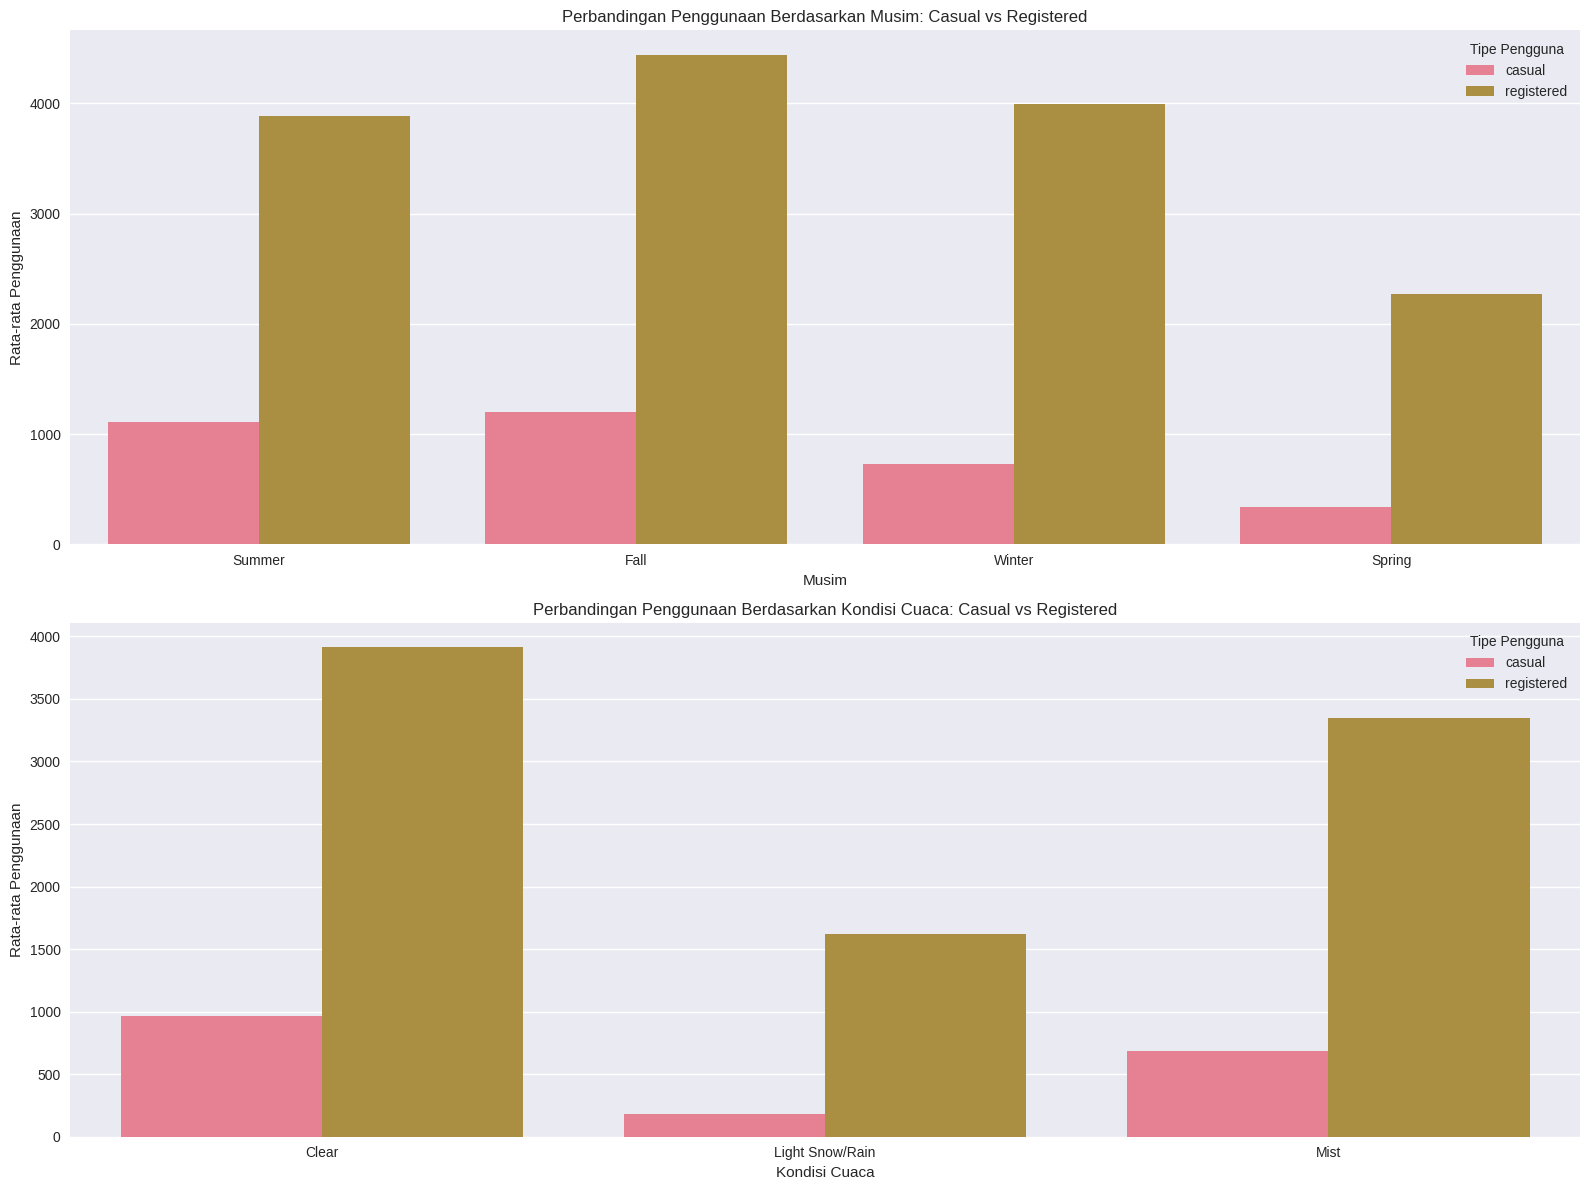

In [34]:
# Agregasi berdasarkan musim
season_user_type = day_df.groupby('season')[['casual', 'registered']].mean().reset_index()
print("Rata-rata penggunaan berdasarkan tipe pengguna dan musim:")
print(season_user_type)

# Reshape data untuk visualisasi
season_user_melted = season_user_type.melt(
    id_vars='season',
    value_vars=['casual', 'registered'],
    var_name='user_type',
    value_name='count'
)

# Agregasi berdasarkan cuaca
weather_user_type = day_df.groupby('weathersit')[['casual', 'registered']].mean().reset_index()
print("\nRata-rata penggunaan berdasarkan tipe pengguna dan kondisi cuaca:")
print(weather_user_type)

# Reshape data untuk visualisasi
weather_user_melted = weather_user_type.melt(
    id_vars='weathersit',
    value_vars=['casual', 'registered'],
    var_name='user_type',
    value_name='count'
)

# Visualisasi pola penggunaan berdasarkan musim dan cuaca
plt.figure(figsize=(16, 12))

# Bar plot berdasarkan musim
plt.subplot(2, 1, 1)
season_order = ['Summer', 'Fall', 'Winter', 'Spring']
sns.barplot(x='season', y='count', hue='user_type', data=season_user_melted, order=season_order)
plt.title('Perbandingan Penggunaan Berdasarkan Musim: Casual vs Registered')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penggunaan')
plt.legend(title='Tipe Pengguna')

# Bar plot berdasarkan kondisi cuaca
plt.subplot(2, 1, 2)
weather_order = weather_user_type['weathersit'].tolist()
sns.barplot(x='weathersit', y='count', hue='user_type', data=weather_user_melted, order=weather_order)
plt.title('Perbandingan Penggunaan Berdasarkan Kondisi Cuaca: Casual vs Registered')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Penggunaan')
plt.legend(title='Tipe Pengguna')

plt.tight_layout()
plt.show()

**Insight Pola Penggunaan Berdasarkan Musim dan Cuaca:**
- Kedua kelompok pengguna menunjukkan preferensi musim yang sama, dengan penggunaan tertinggi pada musim Summer dan Fall
- Pengguna casual lebih sensitif terhadap perubahan musim, dengan penurunan yang lebih drastis pada musim Winter dan Spring
- Pengguna registered memiliki pola yang lebih stabil di seluruh musim, menunjukkan sifat penggunaan yang lebih konsisten
- Kedua kelompok menunjukkan penurunan penggunaan pada kondisi cuaca yang buruk
- Pengguna casual menunjukkan sensitivitas yang lebih tinggi terhadap kondisi cuaca dibandingkan pengguna registered
- Hal ini memperkuat kesimpulan bahwa pengguna registered menggunakan sepeda sebagai transportasi rutin terlepas dari kondisi cuaca atau musim

#### 2.5 Analisis Working Day vs Holiday/Weekend

Rata-rata penggunaan berdasarkan tipe hari:
   workingday       casual   registered          cnt         day_type
0           0  1371.134199  2959.034632  4330.168831  Weekend/Holiday
1           1   606.570000  3978.250000  4584.820000      Working Day

Rasio casual terhadap registered berdasarkan tipe hari:
          day_type  casual_ratio
0  Weekend/Holiday      0.463372
1      Working Day      0.152472


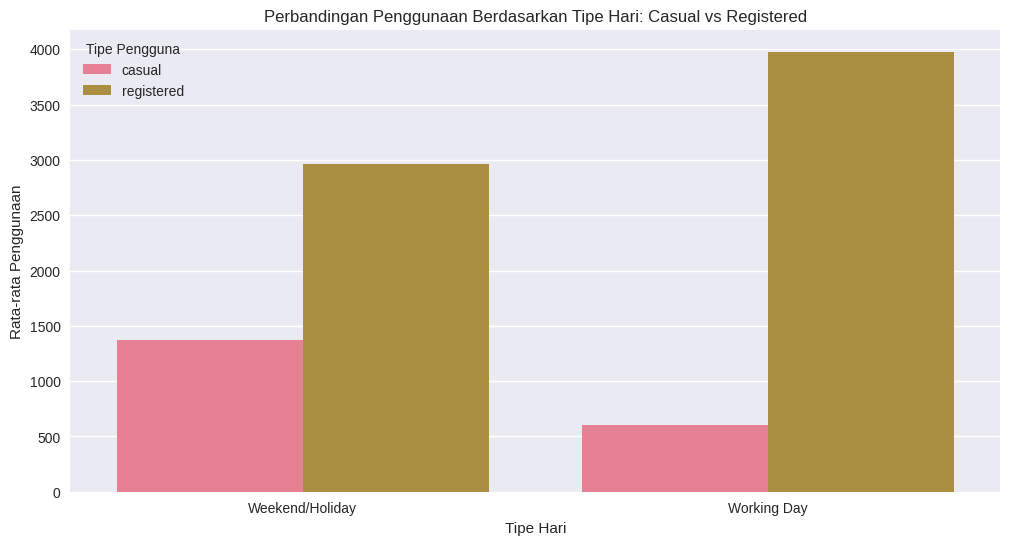

In [35]:
# Agregasi berdasarkan tipe hari
workingday_user_type = day_df.groupby('workingday')[['casual', 'registered', 'cnt']].mean().reset_index()
workingday_user_type['day_type'] = workingday_user_type['workingday'].map({0: 'Weekend/Holiday', 1: 'Working Day'})
print("Rata-rata penggunaan berdasarkan tipe hari:")
print(workingday_user_type)

# Menghitung rasio casual terhadap registered
workingday_user_type['casual_ratio'] = workingday_user_type['casual'] / workingday_user_type['registered']
print("\nRasio casual terhadap registered berdasarkan tipe hari:")
print(workingday_user_type[['day_type', 'casual_ratio']])

# Reshape data untuk visualisasi
workingday_user_melted = workingday_user_type.melt(
    id_vars=['workingday', 'day_type'],
    value_vars=['casual', 'registered'],
    var_name='user_type',
    value_name='count'
)

# Visualisasi pola penggunaan berdasarkan tipe hari
plt.figure(figsize=(12, 6))
sns.barplot(x='day_type', y='count', hue='user_type', data=workingday_user_melted)
plt.title('Perbandingan Penggunaan Berdasarkan Tipe Hari: Casual vs Registered')
plt.xlabel('Tipe Hari')
plt.ylabel('Rata-rata Penggunaan')
plt.legend(title='Tipe Pengguna')
plt.show()

**Insight Pola Penggunaan Working Day vs Weekend/Holiday:**
- Penggunaan pengguna registered lebih tinggi pada hari kerja dibandingkan akhir pekan/liburan
- Penggunaan pengguna casual lebih tinggi pada akhir pekan/liburan dibandingkan hari kerja
- Rasio casual terhadap registered jauh lebih tinggi pada akhir pekan/liburan dibandingkan hari kerja
- Total penggunaan (cnt) tidak berbeda signifikan antara hari kerja dan akhir pekan, menunjukkan bahwa penurunan pengguna registered pada akhir pekan diimbangi dengan peningkatan pengguna casual

## Analisis Lanjutan (Manual Clustering)

Kita akan melakukan pengelompokan manual (clustering) berdasarkan beberapa karakteristik penggunaan sepeda:

1. Berdasarkan intensitas penggunaan (binning)
2. Berdasarkan pola waktu penggunaan (manual grouping)
3. Berdasarkan tipe pengguna dan waktu penggunaan (manual grouping)


Statistik Cluster Intensitas Penggunaan:
                       count         mean   min   max
intensitas_penggunaan                                
Rendah                   183  1933.579235    22  3141
Sedang                   183  3916.650273  3163  4548
Tinggi                   182  5128.126374  4549  5936
Sangat Tinggi            183  7042.448087  5976  8714

Rata-rata Penggunaan berdasarkan Pola Waktu:
       pola_waktu         cnt
2     Puncak Sore  377.629973
3           Siang  230.192493
1     Puncak Pagi  216.704061
0  Di Luar Puncak   77.359071

Statistik Cluster Pola Pengguna:
                            count         mean
pola_pengguna                                 
Akhir Pekan - Kasual           28  4702.821429
Akhir Pekan - Reguler         203  4278.768473
Pengguna Harian - Campuran     21  5380.095238
Pengguna Harian - Komuter     479  4549.954071


/tmp/ipykernel_45474/675437880.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  intensitas_stats = day_df.groupby('intensitas_penggunaan')['cnt'].agg(['count', 'mean', 'min', 'max'])


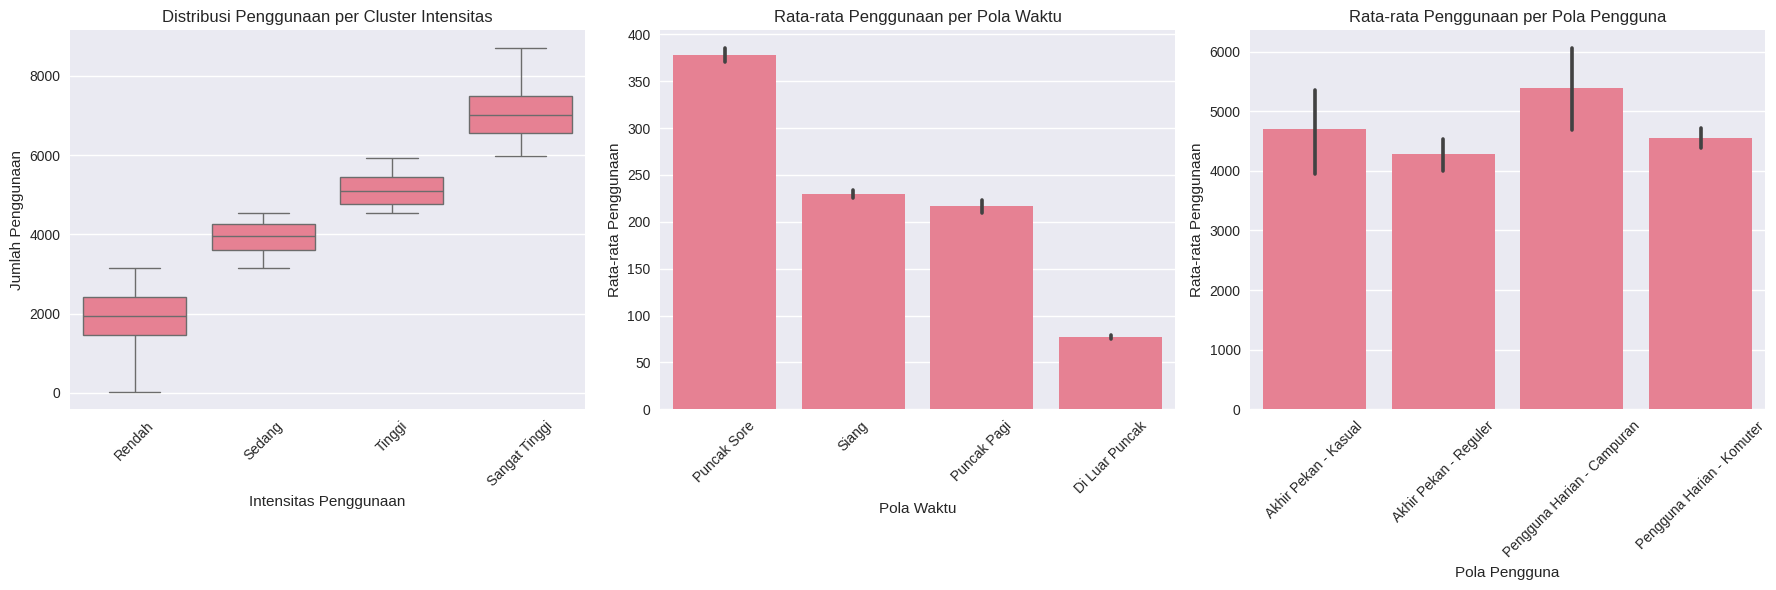


Distribusi Pola Pengguna:
pola_pengguna
Pengguna Harian - Komuter     479
Akhir Pekan - Reguler         203
Akhir Pekan - Kasual           28
Pengguna Harian - Campuran     21
Name: count, dtype: int64


In [36]:
# 1. Clustering berdasarkan intensitas penggunaan (binning)
day_df['intensitas_penggunaan'] = pd.qcut(day_df['cnt'],
                                          q=4,
                                          labels=['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'])
intensitas_stats = day_df.groupby('intensitas_penggunaan')['cnt'].agg(['count', 'mean', 'min', 'max'])
print("\nStatistik Cluster Intensitas Penggunaan:")
print(intensitas_stats)

# 2. Clustering berdasarkan pola waktu penggunaan (manual grouping)
def get_time_pattern(hour):
    if 6 <= hour <= 9:
        return 'Puncak Pagi'
    elif 10 <= hour <= 15:
        return 'Siang'
    elif 16 <= hour <= 19:
        return 'Puncak Sore'
    else:
        return 'Di Luar Puncak'

# Menambahkan kolom pola waktu pada data per jam
hour_df['pola_waktu'] = hour_df['hr'].apply(get_time_pattern)

# Menghitung rata-rata penggunaan per pola waktu dan mengurutkannya
pola_waktu_df = hour_df.groupby('pola_waktu')['cnt'].mean().reset_index()
pola_waktu_df = pola_waktu_df.sort_values(by='cnt', ascending=False)
print("\nRata-rata Penggunaan berdasarkan Pola Waktu:")
print(pola_waktu_df)

# 3. Clustering berdasarkan tipe pengguna dan waktu (manual grouping)
def get_user_pattern(row):
    rasio_kasual = row['casual'] / (row['casual'] + row['registered'] + 1e-9)  # Hindari pembagian dengan nol
    if row['workingday'] == 1:
        if rasio_kasual < 0.2:
            return 'Pengguna Harian - Komuter'
        else:
            return 'Pengguna Harian - Campuran'
    else:
        if rasio_kasual > 0.4:
            return 'Akhir Pekan - Kasual'
        else:
            return 'Akhir Pekan - Reguler'

# Menambahkan kolom pola pengguna pada data harian
day_df['pola_pengguna'] = day_df.apply(get_user_pattern, axis=1)
pola_pengguna_stats = day_df.groupby('pola_pengguna')['cnt'].agg(['count', 'mean'])
print("\nStatistik Cluster Pola Pengguna:")
print(pola_pengguna_stats)

# Visualisasi hasil clustering
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Distribusi Penggunaan per Cluster Intensitas
sns.boxplot(x='intensitas_penggunaan', y='cnt', data=day_df, ax=axes[0])
axes[0].set_title('Distribusi Penggunaan per Cluster Intensitas')
axes[0].set_xlabel('Intensitas Penggunaan')
axes[0].set_ylabel('Jumlah Penggunaan')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Rata-rata Penggunaan per Pola Waktu
sns.barplot(x='pola_waktu', y='cnt', data=hour_df, ax=axes[1], order=pola_waktu_df['pola_waktu'])
axes[1].set_title('Rata-rata Penggunaan per Pola Waktu')
axes[1].set_xlabel('Pola Waktu')
axes[1].set_ylabel('Rata-rata Penggunaan')
axes[1].tick_params(axis='x', rotation=45)

# Plot 3: Rata-rata Penggunaan per Pola Pengguna
sns.barplot(x='pola_pengguna', y='cnt', data=day_df, ax=axes[2], order=pola_pengguna_stats.index)
axes[2].set_title('Rata-rata Penggunaan per Pola Pengguna')
axes[2].set_xlabel('Pola Pengguna')
axes[2].set_ylabel('Rata-rata Penggunaan')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Memastikan distribusi data setelah clustering pengguna
distribusi_pengguna = day_df['pola_pengguna'].value_counts()
print("\nDistribusi Pola Pengguna:")
print(distribusi_pengguna)

# Insight dari Manual Clustering

## 1. Intensitas Penggunaan:
- Terdapat 4 kelompok penggunaan yang jelas: **Rendah**, **Sedang**, **Tinggi**, dan **Sangat Tinggi**.
- Perbedaan antara kelompok **Sangat Tinggi** dan **Rendah** sangat signifikan, dengan jumlah penggunaan pada cluster "Sangat Tinggi" jauh lebih besar dibandingkan dengan cluster lainnya.
- Kelompok **Rendah** memiliki distribusi penggunaan yang lebih bervariasi, sementara kelompok **Sangat Tinggi** cenderung lebih stabil meskipun volumenya tinggi.
- Hal ini menunjukkan bahwa ada sejumlah hari dengan aktivitas penggunaan yang sangat tinggi dibandingkan hari-hari lainnya.

## 2. Pola Waktu:
- Terdapat 4 pola waktu penggunaan: **Puncak Sore**, **Siang**, **Puncak Pagi**, dan **Di Luar Puncak**.
- **Puncak Sore** memiliki rata-rata penggunaan tertinggi, diikuti oleh **Siang** dan **Puncak Pagi**.
- Pola **Di Luar Puncak** memiliki penggunaan terendah secara signifikan dibandingkan pola lainnya.
- Pola ini mengindikasikan adanya aktivitas puncak pada sore hari, kemungkinan terkait dengan aktivitas pulang kerja atau sekolah.

## 3. Pola Pengguna:
- Terdapat 4 pola pengguna: **Akhir Pekan - Kasual**, **Akhir Pekan - Reguler**, **Pengguna Harian - Campuran**, dan **Pengguna Harian - Komuter**.
- **Pengguna Harian - Campuran** memiliki rata-rata penggunaan tertinggi, menunjukkan adanya pengguna kasual dan terdaftar yang aktif pada hari kerja.
- **Akhir Pekan - Kasual** memiliki penggunaan yang lebih rendah dibandingkan dengan **Pengguna Harian - Komuter**.
- Terdapat perbedaan signifikan antara pola penggunaan pada hari kerja dan akhir pekan, mengindikasikan bahwa penggunaan pada akhir pekan cenderung lebih bersifat rekreasi atau santai.


## Conclusion

Berdasarkan analisis yang telah dilakukan, dapat disimpulkan sebagai berikut:

1. **Pola Penggunaan Berdasarkan Waktu dan Cuaca:**
   - Terdapat dua puncak penggunaan sepeda harian: **pagi (8-9)** dan **sore (17-18)**, yang mengindikasikan aktivitas komuting.
   - **Musim Gugur (Fall)** memiliki rata-rata penggunaan tertinggi dibandingkan musim lainnya, menunjukkan bahwa kondisi cuaca pada musim tersebut cenderung mendukung aktivitas bersepeda.
   - Cuaca sangat mempengaruhi penggunaan sepeda, dengan penggunaan tertinggi terjadi pada **cuaca cerah**, sedangkan pada cuaca buruk jumlah pengguna menurun drastis.

2. **Perbandingan Pengguna Kasual dan Terdaftar (Casual dan Registered):**
   - **Pengguna terdaftar (Registered)** mendominasi sistem dengan rata-rata penggunaan hampir **4 kali lipat** dari pengguna kasual.
   - **Pengguna kasual** lebih aktif pada **hari libur (weekend)**, sedangkan pengguna terdaftar cenderung aktif pada **hari kerja (weekday)**.
   - Pola penggunaan kedua kelompok ini berbeda signifikan, menandakan adanya perbedaan motivasi atau tujuan penggunaan sepeda.

3. **Hasil Manual Clustering:**
   - Berhasil mengidentifikasi **4 tingkat intensitas penggunaan**: **Rendah**, **Sedang**, **Tinggi**, dan **Sangat Tinggi**. Terdapat perbedaan signifikan antara penggunaan intensitas tinggi dan rendah.
   - Pola waktu menunjukkan bahwa penggunaan tertinggi terjadi pada **jam komuting**, baik pada pagi maupun sore hari.
   - Pola pengguna menunjukkan perbedaan karakteristik yang jelas antara **pengguna weekday dan weekend**. Pengguna **weekday** didominasi oleh komuter terdaftar, sedangkan pengguna **weekend** cenderung lebih kasual.
   - Perbedaan pola penggunaan ini mengindikasikan bahwa layanan sepeda lebih banyak dimanfaatkan sebagai moda transportasi pada hari kerja dan sebagai rekreasi pada akhir pekan.
